In [64]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from IPython.display import clear_output
from __future__ import print_function
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [65]:
# Analyze every nth frame
frameInterval = 120

# Start offset
startFrame = 0

# Stop after analyzing this many frames
stopAfter = 2

# Duration to show frames in GUI
# 0 for manual advance
blitTime = 16
# v = "test.mp4"
# v = "/Volumes/bank/overwatch/Overwatch 09.10.2016 - 04.21.25.02.mp4"
v = "template_clips/fire-meter.mp4"

def decode_fourcc(v):
    # v is the decimal representation of a fourCC code
    v = int(v)
    return "".join([chr((v >> 8 * i) & 0xFF) for i in range(4)])


In [66]:
def doCap():
    
    def capRelease(cap):
        cap.release()
        print("decoded {}, analyzed {}, frames available {}, input fps {}".format(
                count, analyzed, totalFrames, fps)
             )
        
    try:
        cap = cv2.VideoCapture(v)
        fps = cap.get(cv2.CAP_PROP_FPS)
        width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
        height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
        totalFrames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        fourcc = cap.get(cv2.CAP_PROP_FOURCC)
        
        #x = cv2.VideoWriter_fourcc("A","Y","U","V")       
        count = 0
        analyzed = 0
        previous_roi = None

        while(cap.isOpened()):
            ret, frame = cap.read()
            if not ret:
                # Release the Video Device if ret is false
                capRelease(cap)
                break
            count = count + 1
            if frame is None:
                capRelease(cap)
                break
            if count < startFrame:
                continue
            if count % frameInterval != 0:
                continue
            if analyzed >= stopAfter:
                capRelease(cap)
                break
            
            analyzed = analyzed + 1
            #if count % 60 == 0:
            #    print('.', end="")

            # grab just the player health bar [Y1:Y2, X1:X2]
            roi = frame[1020:1125, 240:500]
            roi2 = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
            # Turn off the axis
            axis('off')
            title("health and fire")
            #imshow(roi)
            imshow(roi2)
            show()
            print(decode_fourcc(fourcc))
            
            # Display the frame until new frame is available
            #clear_output(wait=True)

        
    except KeyboardInterrupt:
        # Release the Video Device
        capRelease(cap)

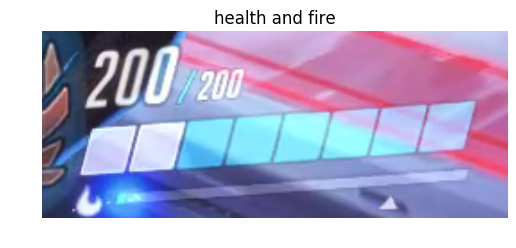

    


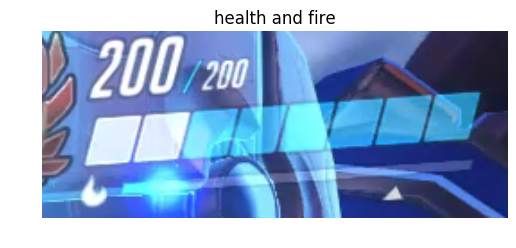

    
decoded 360, analyzed 2, frames available 2263, input fps 59.9327850342


2.492172956466675

In [67]:
from timeit import Timer
t = Timer(doCap)
t.timeit(1)